MODELO DE INVERSIÓN. 

PARTE I: ESTRUCTURA INICIAL.

Librerías

In [1]:
#ASIGNACIÓN LIBRERÍAS. Pypsa para modelizar redes eléctricas/ Pandas para manipulación de datos tabulares (filas y columnas)/ Numpy para cálculos numéricos 
import pypsa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

Creación de Snapshot

In [2]:
#CREACIÓN DEL SNAPSHOT HORARIO. 
# Pasos: 
# 1. Definir el periodo. 
# 2. Crear la red vacía con esos snapshots
# Como es Dispatching no necesitamos asignar pesos ******

# (1) Definir el periodo. 
hours=pd.date_range("2025-01-01", periods=24*7, freq="h") #El periodo de estudio representa 168h de 1 semana (24h*7días).
print (f"hours: {hours}")

# (2) Crear la red vacía con esos snapshots
network=pypsa.Network(snapshots=hours)

# (3) Calcular el peso de cada hora para extrapolar a un año completo
hours_per_year=365*24
snapshot_weight=len(hours)
single_weight=hours_per_year/snapshot_weight

#(4) Asignar el peso a cada snapshot
network.snapshot_weightings= pd.Series(single_weight,  index=network.snapshots)

# (5) Verificar
print("Snapshots creados", network.snapshots)
print ("Peso por snapshot", single_weight)

INFO:pypsa.network.index:Applying weightings to all columns of `snapshot_weightings`


hours: DatetimeIndex(['2025-01-01 00:00:00', '2025-01-01 01:00:00',
               '2025-01-01 02:00:00', '2025-01-01 03:00:00',
               '2025-01-01 04:00:00', '2025-01-01 05:00:00',
               '2025-01-01 06:00:00', '2025-01-01 07:00:00',
               '2025-01-01 08:00:00', '2025-01-01 09:00:00',
               ...
               '2025-01-07 14:00:00', '2025-01-07 15:00:00',
               '2025-01-07 16:00:00', '2025-01-07 17:00:00',
               '2025-01-07 18:00:00', '2025-01-07 19:00:00',
               '2025-01-07 20:00:00', '2025-01-07 21:00:00',
               '2025-01-07 22:00:00', '2025-01-07 23:00:00'],
              dtype='datetime64[ns]', length=168, freq='h')
Snapshots creados DatetimeIndex(['2025-01-01 00:00:00', '2025-01-01 01:00:00',
               '2025-01-01 02:00:00', '2025-01-01 03:00:00',
               '2025-01-01 04:00:00', '2025-01-01 05:00:00',
               '2025-01-01 06:00:00', '2025-01-01 07:00:00',
               '2025-01-01 08:00:00', '20

Lectura de Datos (desde hojas Excel)

In [3]:
# LECTURA DE LOS EXCELS.

#) Modelización de Dispatching 
data = pd.read_excel('excels/Modelizacion_Dispatching_2040_1.xlsm', sheet_name=None, engine="openpyxl")

# Perfiles Solar y Eólico
df_profiles = pd.read_excel('excels/RES_Profiles.xlsm', sheet_name=None, engine='openpyxl', header=3)

# Hydro: Run of River
df_run_of_river = pd.read_excel('excels/run_of_rivers.xlsx', sheet_name=None, engine='openpyxl')

# Demanda eléctrica
df_demand2040 = pd.read_excel('excels/DemandaReal2040.xlsx', sheet_name=None, engine='openpyxl')



In [4]:
# VERIFICACIÓN LECTURA DE DATOS CORRECTA

for sheet, df in data.items():
    print(f"Hoja '{sheet}': {df.shape[0]} filas, {df.shape[1]} columnas")
    display(df.head())

for sheet, df in df_profiles.items():
    print(f"Hoja '{sheet}': {df.shape[0]} filas, {df.shape[1]} columnas")
    display(df.head())

for sheet, df in df_run_of_river.items():
    print(f"Hoja '{sheet}': {df.shape[0]} filas, {df.shape[1]} columnas")
    display(df.head())

for sheet, df in df_demand2040.items():
    print(f"Hoja '{sheet}': {df.shape[0]} filas, {df.shape[1]} columnas")
    display(df.head())



Hoja 'Generators': 5 filas, 8 columnas


,Type,Name,Bus,p_nom,capital_cost,marginal_cost,carrier,overwrite
0,Generator,Solar,electricity_Market,3.103384e+05,NaN,0,Solar,True
1,Generator,Wind,electricity_Market,2.595989e+05,NaN,0,Wind,True
2,Generator,Biomass,electricity_Market,2.462660e+03,NaN,14,Biomass,True
3,Generator,Gas,gas_bus,1.000000e+14,NaN,0,Gas,True
4,Generator,Water,electricity_Market,3.117919e+03,NaN,4,Water,True


Hoja 'Carriers': 8 filas, 3 columnas


,Name,Commodity_Cost,Overwrite
0,AC,NaN,True
1,Water,NaN,True
2,Wind,NaN,True
3,Gas,NaN,True
4,Solar,NaN,True


Hoja 'Buses': 4 filas, 4 columnas


,Type,Name,carrier,overwrite
0,Bus,electricity_Market,Electricity,True
1,Bus,water_bus,Water,True
2,Bus,gas_bus,Gas,True
3,Bus,hydrogen_bus,Hydrogen,True


Hoja 'Links': 4 filas, 12 columnas


,Type,Name,Bus 1,Bus 2,p_nom,capital_cost,efficiency,marginal_cost,Ramp limit up,Ramp limit down,carrier,overwrite
0,Link,CCGT,gas_bus,electricity_Market,24559.64000,NaN,0.58,96.0,842.356028,1052.945035,Gas,True
1,Link,Turbina,water_bus,electricity_Market,115362.96140,NaN,0.85,4.0,NaN,NaN,Water,True
2,Link,Pump,electricity_Market,water_bus,11536.29614,NaN,0.75,40.0,NaN,NaN,AC,True
3,Link,Electrolyzer,electricity_Market,hydrogen_bus,48100.00000,NaN,0.70,NaN,NaN,NaN,Hydrogen,True


Hoja 'Loads': 2 filas, 10 columnas


,Type,Name,Bus,p_set,carrier,overwrite,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Load,Demand,electricity_Market,100.000000,AC,True,NaN,NaN,NaN,61996.575342
1,Load,Demand,hydrogen_bus,8652.968037,hydrogen,True,NaN,NaN,NaN,NaN


Hoja 'StorageUnit': 2 filas, 12 columnas


,Type,Name,Bus,p_nom,max_hours,efficiency_store,efficiency_dispatch,Capital_cost,cyclic_state_of_charge,marginal_cost,carrier,overwrite
0,StorageUnit,Battery,electricity_Market,26698.52,4,0.896582,0.896582,NaN,True,5,AC,True
1,StorageUnit,Hstorage,hydrogen_bus,10000.00,1000,1.000000,1.000000,NaN,True,0,Hydrogen,True


Hoja 'Store': 1 filas, 11 columnas


,Name,Bus,e_nom,e_initial,e_min_pu,e_max_pu,cyclic_state_of_charge,capital_cost,marginal_cost,carrier,overwrite
0,Embalse,water_bus,1387684000,1248915600,0.2,0.9,True,NaN,1,Water,True


Hoja 'Solar': 8760 filas, 16 columnas


,time,local_time,electricity,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,2019-01-01 00:00:00,2019-01-01 01:00:00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-01-01 01:00:00,2019-01-01 02:00:00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-01-01 02:00:00,2019-01-01 03:00:00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-01-01 03:00:00,2019-01-01 04:00:00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-01-01 04:00:00,2019-01-01 05:00:00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Hoja 'Wind': 8760 filas, 14 columnas


,time,local_time,electricity,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,2019-01-01 00:00:00,2019-01-01 01:00:00,0.618,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-01-01 01:00:00,2019-01-01 02:00:00,0.645,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-01-01 02:00:00,2019-01-01 03:00:00,0.664,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-01-01 03:00:00,2019-01-01 04:00:00,0.661,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-01-01 04:00:00,2019-01-01 05:00:00,0.653,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Hoja 'River': 168 filas, 9 columnas


,Hora,Flow,%,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,1,541.541667,0.158114,NaN,NaN,NaN,NaN,1.0,12.997
1,2,541.541667,0.158114,NaN,NaN,NaN,NaN,2.0,13.295
2,3,541.541667,0.158114,NaN,1000.0,NaN,NaN,3.0,13.804
3,4,541.541667,0.158114,NaN,NaN,NaN,NaN,4.0,13.926
4,5,541.541667,0.158114,NaN,3425.0,NaN,NaN,5.0,14.089


Hoja 'Totales': 168 filas, 2 columnas


,Fecha,DEMANDA REAL 2040
0,2025-01-01 00:00:00.000,35845.954713
1,2025-01-01 01:00:00.000,34636.421896
2,2025-01-01 02:00:00.000,32735.361388
3,2025-01-01 02:59:59.985,30881.525375
4,2025-01-01 03:59:59.980,29612.687378


Hoja '2025-01-01': 291 filas, 9 columnas


,Seguimiento de la demanda de energía eléctrica (MW),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,Demanda anual 2024 (MWh),241811000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Demanda anual 2040 (MWh),354090000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Hora,Real,Prevista,Programada,Real 2040 MW,Real 2040 cada h,NaN,Fecha,DEMANDA REAL 2040
3,2025-01-01 00:00:00,24620,25043,24805,36051.692437,35845.954713,NaN,2025-01-01 00:00:00,35845.954713
4,2025-01-01 00:05:00,24701,24941,24805,36170.302798,NaN,NaN,2025-01-01 01:00:00,34636.421896


Hoja '2025-01-02': 291 filas, 9 columnas


,Seguimiento de la demanda de energía eléctrica (MW),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,Demanda anual 2024 (GWh),241811000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Demanda anual 2040 (GWh),354090000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Hora,Real,Prevista,Programada,Real 2040 MW,Real 2040 cada h,NaN,Fecha,DEMANDA REAL 2040
3,2025-01-02 00:00:00,24874,24993,24578,36423.6311,34850.457465,NaN,2025-01-01 00:00:00,34850.457465
4,2025-01-02 00:05:00,24690,24696,24578,36154.195219,NaN,NaN,2025-01-01 01:00:00,32122.175108


Hoja '2025-01-03': 291 filas, 9 columnas


,Seguimiento de la demanda de energía eléctrica (MW),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,Demanda anual 2024 (GWh),241811000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Demanda anual 2040 (GWh),354090000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Hora,Real,Prevista,Programada,Real 2040 MW,Real 2040 cada h,NaN,Fecha,DEMANDA REAL 2040
3,2025-01-03 00:00:00,28116,28586,28132,41170.974191,39786.088402,NaN,2025-01-01 00:00:00,39786.088402
4,2025-01-03 00:05:00,28154,28368,28132,41226.618557,NaN,NaN,2025-01-01 01:00:00,36372.623764


Hoja '2025-01-04': 291 filas, 9 columnas


,Seguimiento de la demanda de energía eléctrica (MW),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,Demanda anual 2024 (GWh),241811000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Demanda anual 2040 (GWh),354090000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Hora,Real,Prevista,Programada,Real 2040 MW,Real 2040 cada h,NaN,Fecha,DEMANDA REAL 2040
3,2025-01-04 00:00:00,28347,28201,27649,41509.233368,40132.523396,NaN,2025-01-01 00:00:00,40132.523396
4,2025-01-04 00:05:00,28438,28024,27649,41642.486984,NaN,NaN,2025-01-01 01:00:00,36619.972737


Hoja '2025-01-05': 291 filas, 9 columnas


,Seguimiento de la demanda de energía eléctrica (MW),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,Demanda anual 2024 (GWh),241811000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Demanda anual 2040 (GWh),354090000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Hora,Real,Prevista,Programada,Real 2040 MW,Real 2040 cada h,NaN,Fecha,DEMANDA REAL 2040
3,2025-01-05 00:00:00,26852,26805,26331,39320.066829,37817.302842,NaN,2025-01-01 00:00:00,37817.302842
4,2025-01-05 00:05:00,26758,26572,26331,39182.420237,NaN,NaN,2025-01-01 01:00:00,34690.723964


Hoja '2025-01-06': 291 filas, 9 columnas


,Seguimiento de la demanda de energía eléctrica (MW),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,Demanda anual 2024 (GWh),241811000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Demanda anual 2040 (GWh),354090000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Hora,Real,Prevista,Programada,Real 2040 MW,Real 2040 cada h,NaN,Fecha,DEMANDA REAL 2040
3,2025-01-06 00:00:00,25821,26165,25199,37810.347296,36219.601755,NaN,2025-01-01 00:00:00,36219.601755
4,2025-01-06 00:05:00,25554,25926,25199,37419.372402,NaN,NaN,2025-01-01 01:00:00,33268.131795


Hoja '2025-01-07': 291 filas, 9 columnas


,Seguimiento de la demanda de energía eléctrica (MW),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,Demanda anual 2024 (GWh),241811000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Demanda anual 2040 (GWh),354090000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Hora,Real,Prevista,Programada,Real 2040 MW,Real 2040 cada h,NaN,Fecha,DEMANDA REAL 2040
3,2025-01-07 00:00:00,25503,25639,24947,37344.691805,36097.33058,NaN,2025-01-01 00:00:00,36097.33058
4,2025-01-07 00:05:00,25310,25118,24947,37062.076994,NaN,NaN,2025-01-01 01:00:00,33390.769051


In [5]:
#PROCESAMIENTO 

# Run-of-River Inflow Semanal
df_hydro_inflows = df_run_of_river["River"]
hydro_inflows = df_hydro_inflows["%"].iloc[:len(hours)].reset_index(drop=True)

# Perfil Solar Semanal
df_Solar = df_profiles["Solar"]
solar_profile = df_Solar["electricity"].iloc[:len(hours)].reset_index(drop=True)

# Perfil Eólico Semanal
df_Wind = df_profiles["Wind"]
wind_profile = df_Wind["electricity"].iloc[:len(hours)].reset_index(drop=True)

# Demanda 2040
df_demand = df_demand2040["Totales"]
df_demand.index = pd.date_range(start='2025-01-01', periods=168, freq='h')
demand_profile = df_demand["DEMANDA REAL 2040"].iloc[:len(hours)].reset_index(drop=True)


C:\Users\EXT10348\AppData\Local\Temp\ipykernel_18632\1446496391.py:4: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.



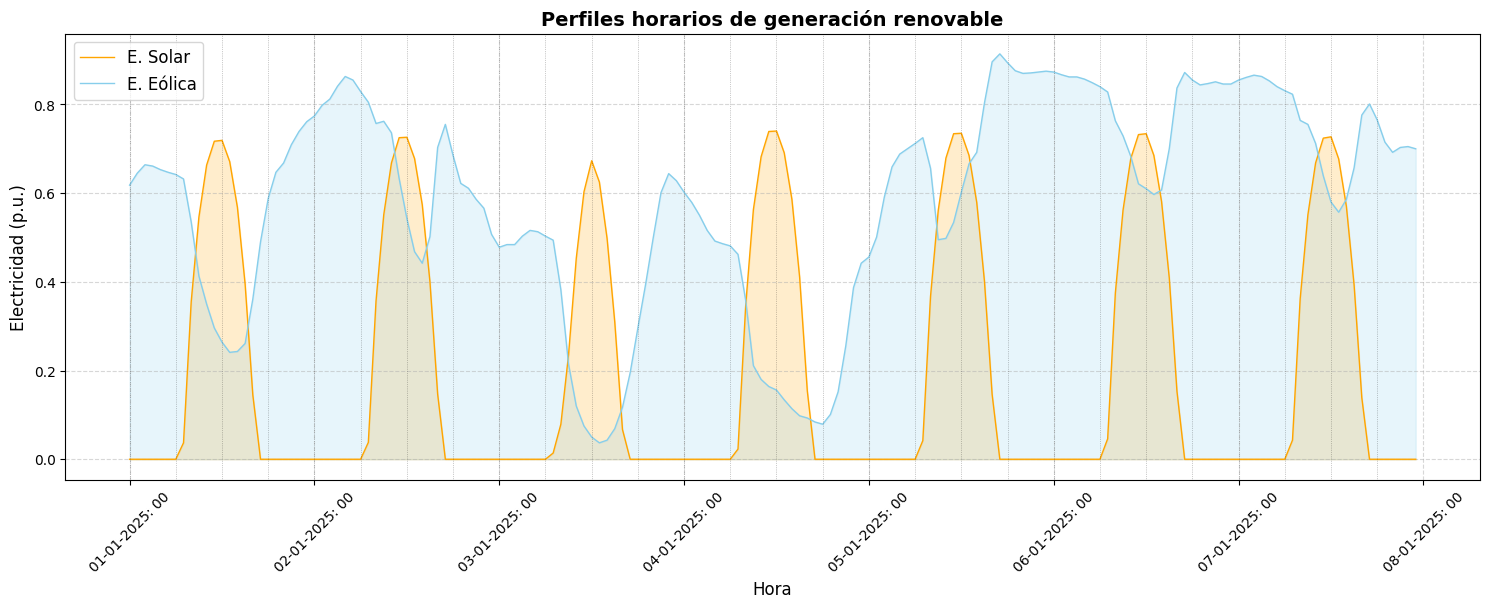

In [6]:
# GRAFICAR

# Gráfica de Perfiles Horarios de Generación Renovable.
hours = pd.date_range(start="2025-01-01", end="2025-01-07 23:00", freq="H") #para que no me ploteé el día 8 con 1 hora
plt.figure(figsize=(15, 6))
plt.style.use('default')
plt.plot(hours, solar_profile, label="E. Solar", color="orange", linewidth=1, linestyle="-")
plt.plot(hours, wind_profile, label="E. Eólica", color="skyblue", linewidth=1, linestyle="-")
plt.title("Perfiles horarios de generación renovable", fontsize=14, fontweight="bold")
plt.xlabel("Hora", fontsize=12)
plt.ylabel("Electricidad (p.u.)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(loc="upper left", fontsize=12)
plt.tight_layout()
plt.fill_between(hours, solar_profile, color="orange", alpha=0.2)
plt.fill_between(hours, wind_profile, color="skyblue", alpha=0.2)

for day in pd.date_range("2025-01-01", "2025-01-07"):
    for hour in [0, 6, 12, 18]:
        timestamp = pd.Timestamp(day.date()) + pd.Timedelta(hours=hour)
        plt.axvline(x=timestamp, color='black', linestyle=':', linewidth=0.5, alpha=0.4)
       
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y: %H'))
plt.xticks(rotation=45)
plt.show()



C:\Users\EXT10348\AppData\Local\Temp\ipykernel_18632\1501829233.py:2: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.



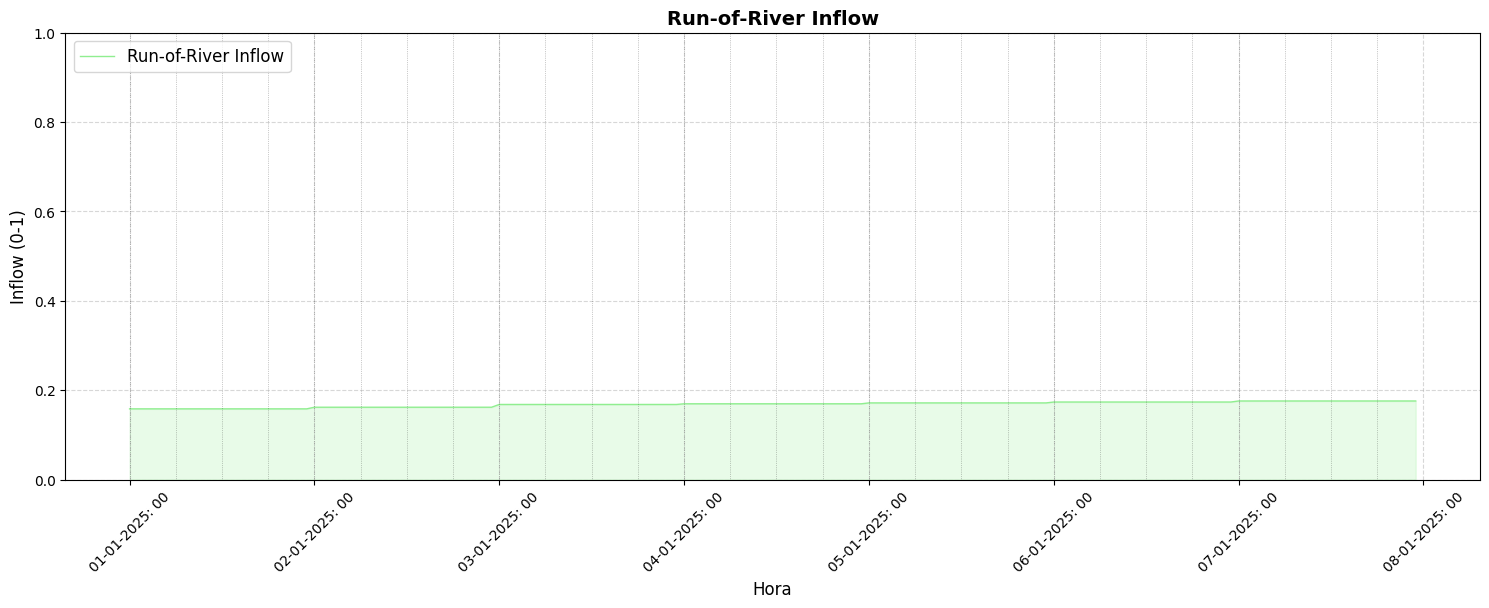

In [7]:

#Gráfica Inflow Run-of-River
hours = pd.date_range(start="2025-01-01", end="2025-01-07 23:00", freq="H") #para que no me ploteé el día 8 con 1 hora

plt.figure(figsize=(15, 6))
plt.style.use('default')
plt.plot(hours, hydro_inflows, label="Run-of-River Inflow", color="lightgreen", linewidth=1, linestyle="-")
plt.fill_between(hours, hydro_inflows, color="lightgreen", alpha=0.2)
plt.title("Run-of-River Inflow", fontsize=14, fontweight="bold")
plt.xlabel("Hora", fontsize=12)
plt.ylabel("Inflow (0-1)", fontsize=12)
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(loc="upper left", fontsize=12)
plt.tight_layout()

for day in pd.date_range("2025-01-01", "2025-01-07"):
    for hour in [0, 6, 12, 18]:
        timestamp = pd.Timestamp(day.date()) + pd.Timedelta(hours=hour)
        plt.axvline(x=timestamp, color='black', linestyle=':', linewidth=0.5, alpha=0.4)
       
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y: %H'))
plt.xticks(rotation=45)
plt.show()





C:\Users\EXT10348\AppData\Local\Temp\ipykernel_18632\3255236423.py:3: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.



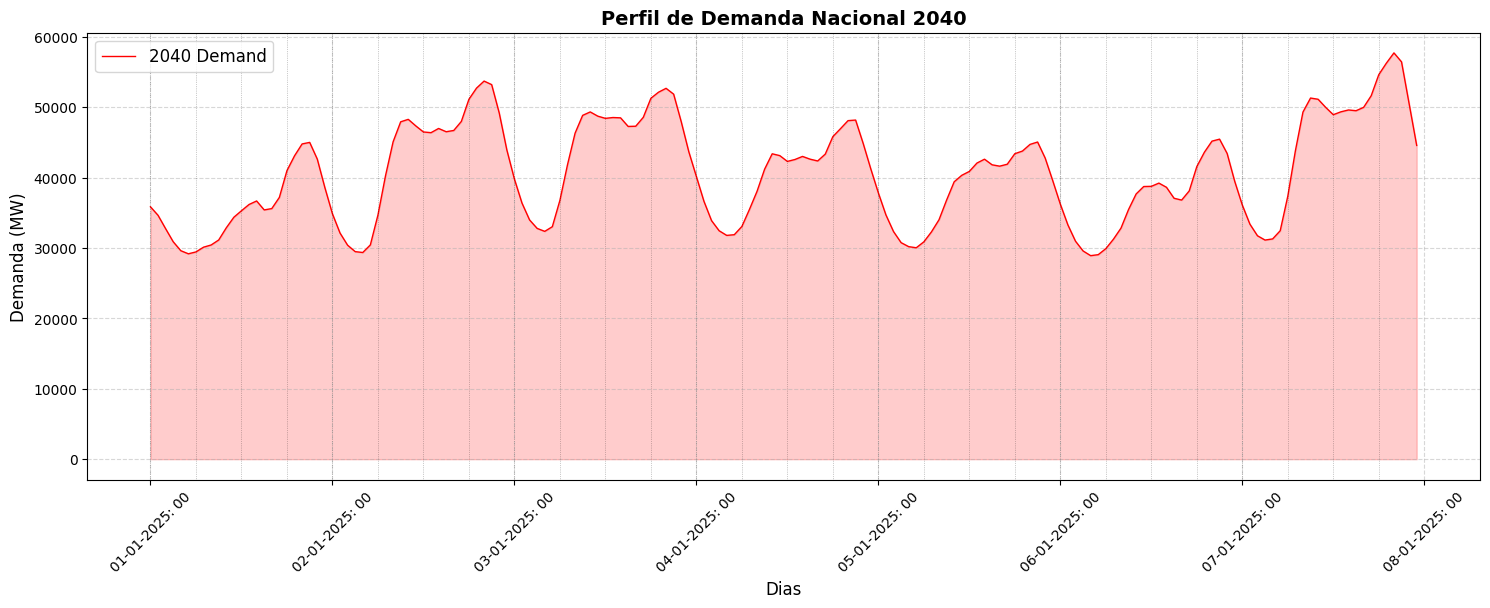

In [8]:
 
# Dibuja la Demanda para la primera semana de 2040.

hours = pd.date_range(start="2025-01-01", end="2025-01-07 23:00", freq="H") #para que no me ploteé el día 8 con 1 hora
plt.figure(figsize=(15, 6))
plt.style.use('default')
plt.plot(hours, demand_profile, label="2040 Demand", color="red", linewidth=1, linestyle="-")
plt.fill_between(hours, demand_profile, color="red", alpha=0.2)
plt.title("Perfil de Demanda Nacional 2040",  fontsize=14, fontweight="bold")
plt.xlabel("Dias", fontsize=12)
plt.ylabel("Demanda (MW)", fontsize=12)

plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(loc="upper left", fontsize=12)
plt.tight_layout()

for day in pd.date_range("2025-01-01", "2025-01-07"):
    for hour in [0, 6, 12, 18]:
        timestamp = pd.Timestamp(day.date()) + pd.Timedelta(hours=hour)
        plt.axvline(x=timestamp, color='black', linestyle=':', linewidth=0.5, alpha=0.4)
       
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y: %H'))
plt.xticks(rotation=45)
plt.show()

In [9]:
#VERIFICACIÓN DEL PERFIL SOLAR

# Extrae las series de p_max_pu desde la red
solar_pm = network.generators_t.p_max_pu["Solar"]
wind_pm  = network.generators_t.p_max_pu["Wind"]

# Crea la figura con dos subplots
fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Plot Solar
axes[0].plot(solar_profile.index, solar_profile, label="Perfil Solar Original")
axes[0].plot(solar_pm.index,     solar_pm,     linestyle="--", label="p_max_pu Solar en la Red")
axes[0].set_title("Verificación Perfil Solar")
axes[0].set_ylabel("p_max_pu")
axes[0].legend(loc="upper left", fontsize=9)

# Plot Wind
axes[1].plot(wind_profile.index, wind_profile, label="Perfil Eólico Original")
axes[1].plot(wind_pm.index,      wind_pm,      linestyle="--", label="p_max_pu Eólico en la Red")
axes[1].set_title("Verificación Perfil Eólico")
axes[1].set_xlabel("Hora")
axes[1].set_ylabel("p_max_pu")
axes[1].legend(loc="upper left", fontsize=9)

plt.tight_layout()
plt.show()

KeyError: 'Solar'

PARTE II: CREACIÓN DEL ENTORNO: Llamada a Componentes

In [ ]:
# Carriers
df_carriers = data["Carriers"]

for _, carrier in df_carriers.iterrows():
    network.add(
        "Carrier", 
        carrier["Name"],            # usa 'Name' si la columna está con mayúscula
        overwrite=carrier["Overwrite"]
    )

In [ ]:
# Buses
df_buses=data["Buses"]
for _, bus in df_buses.iterrows():
    network.add(
        "Bus", 
        bus["Name"], 
        carrier=bus["carrier"], 
        overwrite=bus["overwrite"]
    )

In [ ]:
# Loads

h2_profile = pd.Series(8652.968037, index=network.snapshots)

df_loads = data["Loads"]
for _, loads in df_loads.iterrows():
    network.add(
        "Load", 
        loads["Name"], 
        bus=loads["Bus"], 
        p_set=h2_profile, 
        carrier=bus["carrier"],
        overwrite=loads["overwrite"]
         )
    
network.add(
        "Load",
        name="Demanda_Nacional", #tiene un único nombre.
        bus="electricity_Market",
        p_set=df_demand['DEMANDA REAL 2040'], #Es una serie temporal (time series) con la potencia demandada (en MW ) para cada instante de tiempo (cada hora de la primera semana del año 2040).
        carrier="Electricity",
        overwrite=True
        )

demand = network.loads_t.p_set["Demanda_Nacional"]

In [ ]:
# GENERADORES
# ---------------------------------------------------------------------------------------------------------------------
# -------------- Te indica de que hoja vamos a asignar los datos ------------------------------------------------------
df_generators=data["Generators"]
# ---------------- Se asegura de que el índice de solar y wind coincidan ----------------------------------------------
solar_profile.index = hours
wind_profile.index  = hours
# ---------------- Asignas los atributos de los generadores -----------------------------------------------------------
for _, gen in df_generators.iterrows():
    carrier_key = gen["carrier"].strip().lower()
    gen_kwargs = {      
        "bus":           gen["Bus"],
        "p_nom":         gen["p_nom"],
        "capital_cost":  gen["capital_cost"],
        "marginal_cost": gen["marginal_cost"],
        "carrier":       gen["carrier"],
        "overwrite":     gen["overwrite"]
    }
# ---------------- Asignas el perfil horario cuando el generador es solar, wind o water -------------------------------
    if carrier_key == "solar":
        gen_kwargs["p_max_pu"] = solar_profile
    elif carrier_key == "wind":
        gen_kwargs["p_max_pu"] = wind_profile
    elif carrier_key == "Water":
        gen_kwargs["p_max_pu"] = hydro_inflows
# ---------------- Añades el generador a tu modelo ---------------------------------------------------------------------
    network.add("Generator", gen["Name"], **gen_kwargs)
# ---------------------------------------------------------------------------------------------------------------------

In [ ]:
# Links
# ---------------------------------------------------------------------------------------------------------------------
# -------------- Te indica de que hoja vamos a asignar los datos ------------------------------------------------------
df_links = data["Links"]
# ------------------------------------- # Check if buses exist --------------------------------------------------------
for _, lk in df_links.iterrows():
    name = lk["Name"].strip()
    bus0 = lk["Bus 1"].strip()
    bus1 = lk["Bus 2"].strip()
   
    if bus0 not in network.buses.index:
        raise ValueError(f"Bus '{bus0}' not found in network")
    if bus1 not in network.buses.index:
        raise ValueError(f"Bus '{bus1}' not found in network")
# --------------- se recorren las celdas, y se crean los links --------------------------------------------------------
for _, lk in df_links.iterrows():
    name      = lk["Name"].strip()
    bus0      = lk["Bus 1"]
    bus1      = lk["Bus 2"]
    p_nom     = lk["p_nom"]
    #p_nom_extendable = lk["p_nom_extendable"]
    capital_cost = lk["capital_cost"]
    eff       = lk["efficiency"]
    mcost     = lk["marginal_cost"]
    carrier   = lk["carrier"]
    overwrite = lk["overwrite"]
# -------------- Dependiendo de la tecnología del link, ajustamos parámetros ------------------------------------------
    if name.lower() == "ccgt":
        network.add(
            "Link", name,
            bus0=bus0, bus1=bus1,
            p_nom=p_nom, efficiency=eff,
            marginal_cost=mcost, carrier=carrier,
            #p_nom_extendable=p_nom_extendable, 
            capital_cost=capital_cost,
            overwrite=overwrite,
            ramp_limit_up=lk["Ramp limit up"],
            ramp_limit_down=lk["Ramp limit down"]
        )
 # -------------- Turbina hidroeléctrica  -----------------------------------------------------------------------------
    elif name.lower() == "turbina":
        network.add(
            "Link", name,
            bus0=bus0, bus1=bus1,
            p_nom=p_nom, efficiency=eff,
            marginal_cost=mcost, carrier=carrier,
            capital_cost=capital_cost,
            overwrite=overwrite
        )
 # -------------- Bomba  ----------------------------------------------------------------------------------------------
    elif name.lower() == "pump":
        network.add(
            "Link", name,
            bus0=bus0, bus1=bus1,
            p_nom=p_nom, efficiency=eff,
            marginal_cost=mcost, carrier=carrier, 
            capital_cost=capital_cost,
            overwrite=overwrite
        )
 # -------------- electrolyzer ----------------------------------------------------------------------------------------
    elif name.lower() == "electrolyzer":
        network.add(
            "Link", name,
            bus0=bus0, bus1=bus1,
            p_nom=p_nom, efficiency=eff, 
            capital_cost=capital_cost,
            marginal_cost=mcost, carrier=carrier,
            overwrite=overwrite)
# ---------------------------------------------------------------------------------------------------------------------

In [ ]:
# Verificación
     
print("\n=== Resumen de todos los Links en la red ===")
print(network.links[[
        'bus0','bus1','p_nom','efficiency','marginal_cost','carrier',
        'ramp_limit_up','ramp_limit_down'
    ]])
for link_name in ["CCGT", "Turbina", "Pump", "Electrolyzer"]:
        if link_name in network.links.index:
            row = network.links.loc[link_name]
            print(f"\n--- Detalle de {link_name} ---")
            print(f"Origen (bus0):        {row['bus0']}")
            print(f"Destino (bus1):       {row['bus1']}")
            print(f"Capacidad (p_nom):    {row['p_nom']} MW")
            print(f"Eficiencia:           {row['efficiency']*100:.1f}%")
            print(f"Coste marginal:       {row['marginal_cost']} €/MWh")
            print(f"Carrier:              {row['carrier']}")
            # Ramp limits solo para CCGT
            if link_name == "CCGT":
                print(f"Ramp up limit:        {row['ramp_limit_up']} MW/h")
                print(f"Ramp down limit:      {row['ramp_limit_down']} MW/h")
        else:
            print(f"\n⚠️ El link '{link_name}' no se encontró en la red.")


=== Resumen de todos los Links en la red ===
                            bus0                bus1         p_nom  \
name                                                                 
CCGT                     gas_bus  electricity_Market   24559.64000   
Turbina                water_bus  electricity_Market  115362.96140   
Pump          electricity_Market           water_bus   11536.29614   
Electrolyzer  electricity_Market        hydrogen_bus   48100.00000   

              efficiency  marginal_cost   carrier  ramp_limit_up  \
name                                                               
CCGT                0.58           96.0       Gas     842.356028   
Turbina             0.85            4.0     Water            NaN   
Pump                0.75           40.0        AC            NaN   
Electrolyzer        0.70            0.0  Hydrogen            NaN   

              ramp_limit_down  
name                           
CCGT              1052.945035  
Turbina                   Na

In [ ]:
# Storage Units


df_storage = data["StorageUnit"]
for _, st in df_storage.iterrows():
    name      = st["Name"].strip()
    bus      = st["Bus"]         # origen de la energía
    p_nom     = st["p_nom"]         # capacidad nominal
    max_hours = st["max_hours"]         # horas máximas de almacenamiento
    efficiency_store = st["efficiency_store"]  # eficiencia de carga
    efficiency_dispatch = st["efficiency_dispatch"]  # eficiencia de descarga
    marginal_cost = st["marginal_cost"]   # coste marginal
    capital_cost = st["Capital_cost"]     # coste de inversión
    cyclic_state_of_charge = st["cyclic_state_of_charge"]  # estado de carga cíclico
    state_of_charge_initial=0.5 * st["p_nom"] * st["max_hours"]
    carrier   = st["carrier"]         # etiqueta de carrier
    overwrite = st["overwrite"]       # si sobreescribe parámetros
    # Para CCGT incluimos además ramp limits
    if name.lower() == "hstorage":
        network.add("StorageUnit", 
            name= name, 
            bus=bus, 
            p_nom=p_nom*8760, 
            max_hours=max_hours, 
            efficiency_store=efficiency_store, 
            efficiency_dispatch=efficiency_dispatch,
            marginal_cost=marginal_cost, 
            carrier=carrier, 
            overwrite=overwrite, 
            capital_cost=capital_cost
        )

        print(f"StorageUnit {name} añadida en bus {bus}: {p_nom} MW · {max_hours} h y marginal cost {marginal_cost}")

    elif name.lower() == "battery":
        network.add("StorageUnit",
            name= name, 
            bus=bus, 
            p_nom=p_nom, 
            efficiency_store=efficiency_store, 
            efficiency_dispatch=efficiency_dispatch,
            marginal_cost=marginal_cost, 
            cyclic_state_of_charge=cyclic_state_of_charge, 
            carrier=carrier, 
            state_of_charge_initial=0.5 * st["p_nom"] * st["max_hours"], 
            overwrite=overwrite, 
            capital_cost=capital_cost
        )
        
        print(f"StorageUnit {name} añadida en bus {bus}: {p_nom} MW · {max_hours} h y marginal cost {marginal_cost}")

StorageUnit Battery añadida en bus electricity_Market: 26698.52 MW · 4 h y marginal cost 5
StorageUnit Hstorage añadida en bus hydrogen_bus: 10000.0 MW · 1000 h y marginal cost 0


In [ ]:
# Store

df_store = data["Store"]
print("Type of df_store:", type(df_store))
for _, store in df_store.iterrows():
    network.add("Store", 
        store["Name"], 
        bus=store["Bus"], 
        e_nom=store["e_nom"],
        e_initial=store["e_initial"], 
        e_min_pu=store["e_min_pu"], 
        e_max_pu=store["e_max_pu"],  
        e_cyclic=store["cyclic_state_of_charge"], 
        capital_cost=store["capital_cost"], 
        marginal_cost=store["marginal_cost"], 
        carrier=store["carrier"],
        overwrite=store["overwrite"]
        )
    
    print(f"Store: {store['Name']} añadido en bus {store['Bus']}: {store['e_nom']} MWh · inicial {store['e_initial']} MWh · min {store['e_min_pu']} pu · max {store['e_max_pu']} pu · coste marginal {store['marginal_cost']}")

Type of df_store: <class 'pandas.core.frame.DataFrame'>
Store: Embalse añadido en bus water_bus: 1387684000 MWh · inicial 1248915600 MWh · min 0.2 pu · max 0.9 pu · coste marginal 1


In [ ]:
# RESTRICCIÓN POR EMISIONES DE CO2. Para que el gas no sobreproduzca cuando no toca.
# Precio CO2 y factor de emisión
co2_price = 100  # €/tCO2
emission_factor = 0.202  # tCO2/MWh para gas

# Coste adicional por CO2
co2_cost = co2_price * emission_factor  # 20.2 €/MWh

# Sumarlo al coste marginal del link CCGT
network.links.at["CCGT", "marginal_cost"] += co2_cost


In [ ]:
# Verificaciones

print("Solar p_max_pu:\n", network.generators_t.p_max_pu["Solar"].head())
print("Wind  p_max_pu:\n", network.generators_t.p_max_pu["Wind"].head())
print("Información de inversión de los generadores:")
print(network.generators)
print(network.links)

Solar p_max_pu:
 snapshot
2025-01-01 00:00:00    0.0
2025-01-01 01:00:00    0.0
2025-01-01 02:00:00    0.0
2025-01-01 03:00:00    0.0
2025-01-01 04:00:00    0.0
Freq: h, Name: Solar, dtype: float64
Wind  p_max_pu:
 snapshot
2025-01-01 00:00:00    0.618
2025-01-01 01:00:00    0.645
2025-01-01 02:00:00    0.664
2025-01-01 03:00:00    0.661
2025-01-01 04:00:00    0.653
Freq: h, Name: Wind, dtype: float64
Información de inversión de los generadores:
                        bus control type         p_nom  p_nom_mod  \
name                                                                
Solar    electricity_Market      PQ       2.238044e+05        0.0   
Wind     electricity_Market      PQ       2.595989e+05        0.0   
Biomass  electricity_Market      PQ       2.462660e+03        0.0   
Gas                 gas_bus      PQ       1.000000e+14        0.0   
Water    electricity_Market      PQ       3.424666e+03        0.0   

         p_nom_extendable  p_nom_min  p_nom_max  p_nom_set  p_min_

PARTE III: OPTIMIZACIÓN

In [ ]:
network.optimize(solver_name="highs")

Index(['electricity_Market', 'water_bus'], dtype='object', name='name')
Index(['Water '], dtype='object', name='name')
Index(['Demanda_Nacional'], dtype='object', name='name')


KeyError: 'Link-p0'

PARTE IV: OBTENCIÓN DE RESULTADOS.

{'nodes': {'Bus': <matplotlib.collections.PatchCollection at 0x14e65e47590>},
 'branches': {'Link': <matplotlib.collections.LineCollection at 0x14e65f85910>},
 'flows': {}}

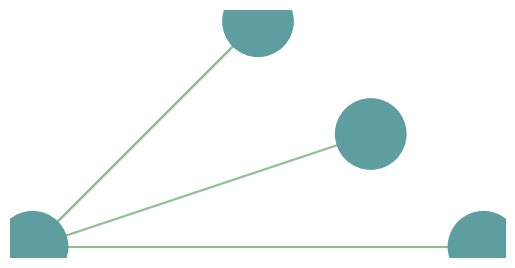

In [ ]:
network.plot()

In [ ]:
# RESULTADOS NUMÉRICOS QUE CUBREN LA DEMANDA

print(" Generator p:", network.generators_t.p.iloc[0])
print("Link p0:",     network.links_t.p0.iloc[0])
print("Link p1:",     network.links_t.p1.iloc[0])
print(" Load p:",      network.loads_t.p_set.iloc[0])

 Generator p: name
Solar         -0.000000
Wind       48207.337623
Biomass       -0.000000
Gas           -0.000000
Water         -0.000000
Name: 2025-01-01 00:00:00, dtype: float64
Link p0: name
CCGT               -0.00000
Turbina            -0.00000
Pump               -0.00000
Electrolyzer    12361.38291
Name: 2025-01-01 00:00:00, dtype: float64
Link p1: name
CCGT               0.000000
Turbina            0.000000
Pump               0.000000
Electrolyzer   -8652.968037
Name: 2025-01-01 00:00:00, dtype: float64
 Load p: name
Demand               8652.968037
Demanda_Nacional    35845.954713
Name: 2025-01-01 00:00:00, dtype: float64


C:\Users\EXT10348\AppData\Local\Temp\ipykernel_8388\1917038006.py:4: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.



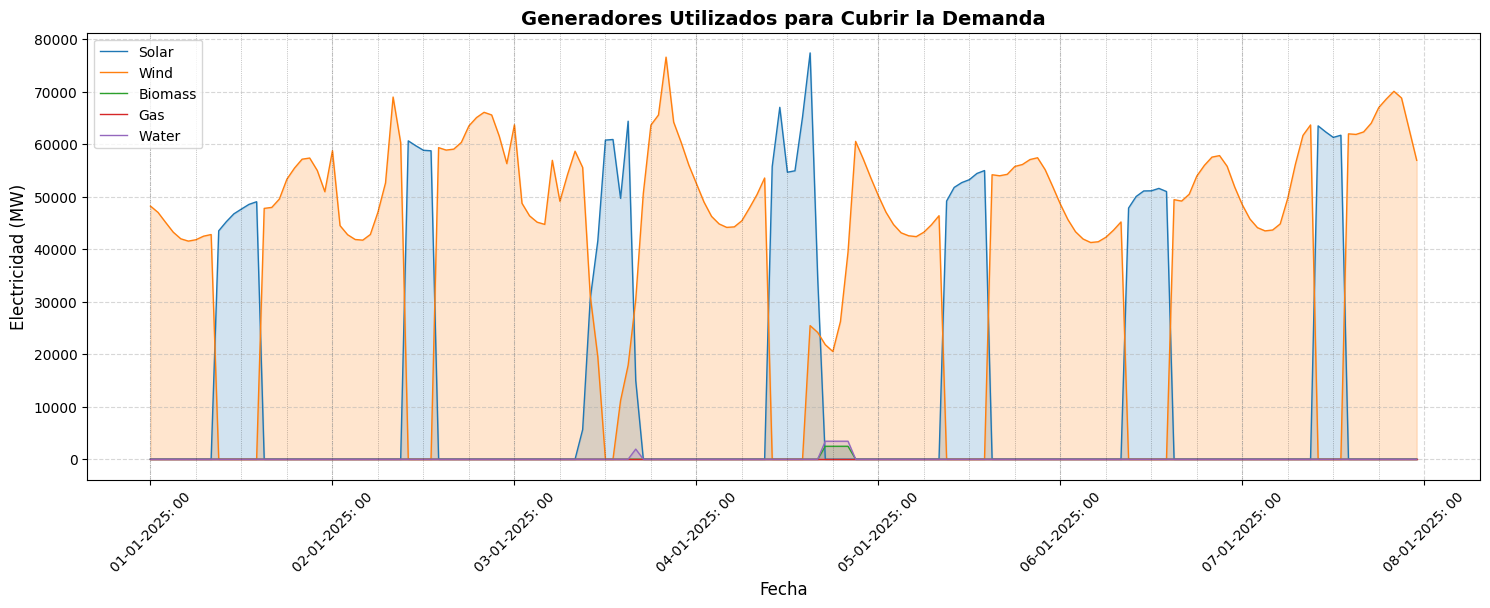

In [ ]:
# Gráfica de Generadores Utilizados para Cubrir la Demanda

# Asegurar las horas de estudio son correctas
hours = pd.date_range(start="2025-01-01", end="2025-01-07 23:00", freq="H") #para asegurarse que se grafica en el rango adecuado

plt.figure(figsize=(15, 6))
plt.style.use('default')

# Graficar cada generador manualmente
for gen in network.generators_t.p.columns:
    y= network.generators_t.p[gen]
    plt.plot(hours, network.generators_t.p[gen], label=gen, linewidth=1)
    plt.fill_between(hours, y, color=plt.gca().lines[-1].get_color(), alpha=0.2)
# Personalización
plt.title("Generadores Utilizados para Cubrir la Demanda", fontsize=14, fontweight="bold")
plt.xlabel("Fecha", fontsize=12)
plt.ylabel("Electricidad (MW)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(loc="upper left", fontsize=10)

plt.tight_layout()

# Líneas verticales
for day in pd.date_range("2025-01-01", "2025-01-07"):
    for hour in [0, 6, 12, 18]:
        timestamp = pd.Timestamp(day.date()) + pd.Timedelta(hours=hour)
        plt.axvline(x=timestamp, color='black', linestyle=':', linewidth=0.5, alpha=0.4)

# Formato del eje X
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y: %H'))

# Mostrar
plt.show()


C:\Users\EXT10348\AppData\Local\Temp\ipykernel_8388\1438357164.py:2: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.



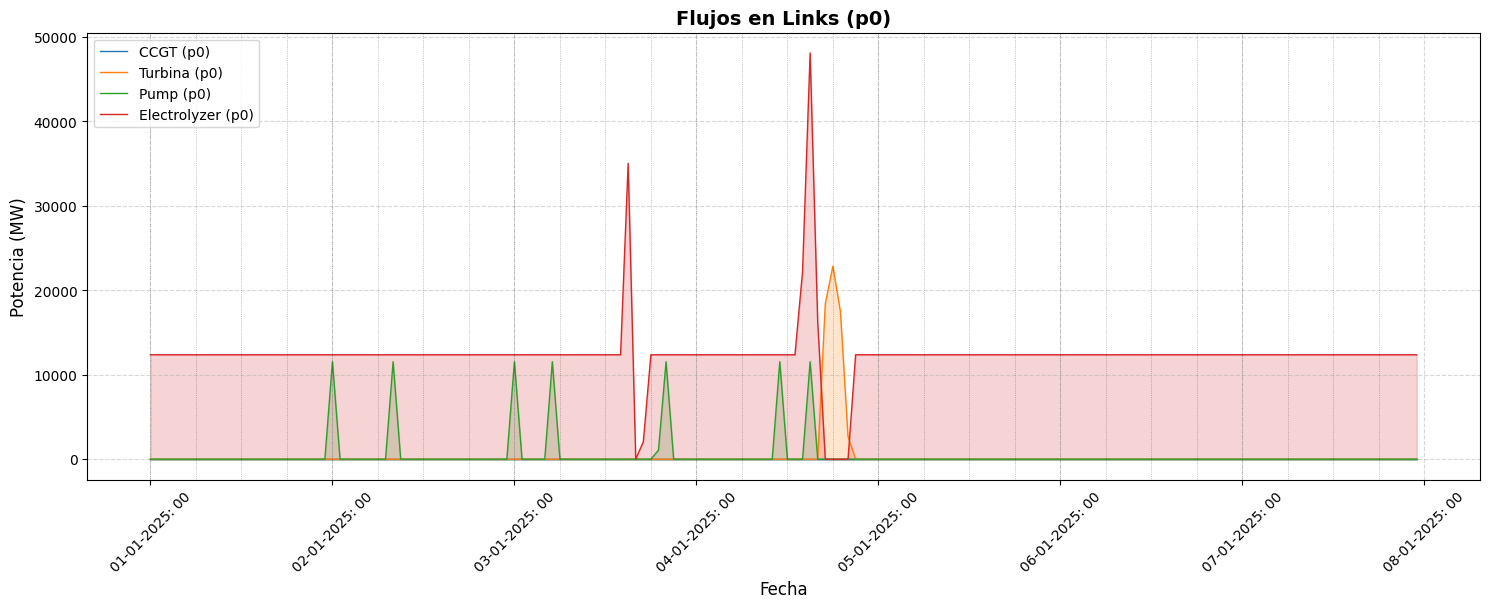

In [ ]:

# Asegurar las horas correctas
hours = pd.date_range(start="2025-01-01", end="2025-01-07 23:00", freq="H")

plt.figure(figsize=(15, 6))
plt.style.use('default')

# Graficar cada link manualmente (p0)
for link in network.links_t.p0.columns:
    y = network.links_t.p0[link]
    plt.plot(hours, y, label=f"{link} (p0)", linewidth=1)
    plt.fill_between(hours, y, color=plt.gca().lines[-1].get_color(), alpha=0.2)

# Personalización
plt.title("Flujos en Links (p0)", fontsize=14, fontweight="bold")
plt.xlabel("Fecha", fontsize=12)
plt.ylabel("Potencia (MW)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(loc="upper left", fontsize=10)
plt.tight_layout()

# Líneas verticales
for day in pd.date_range("2025-01-01", "2025-01-07"):
    for hour in [0, 6, 12, 18]:
        timestamp = pd.Timestamp(day.date()) + pd.Timedelta(hours=hour)
        plt.axvline(x=timestamp, color='black', linestyle=':', linewidth=0.5, alpha=0.4)

# Formato del eje X
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y: %H'))

plt.show()


C:\Users\EXT10348\AppData\Local\Temp\ipykernel_8388\2521935935.py:2: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.



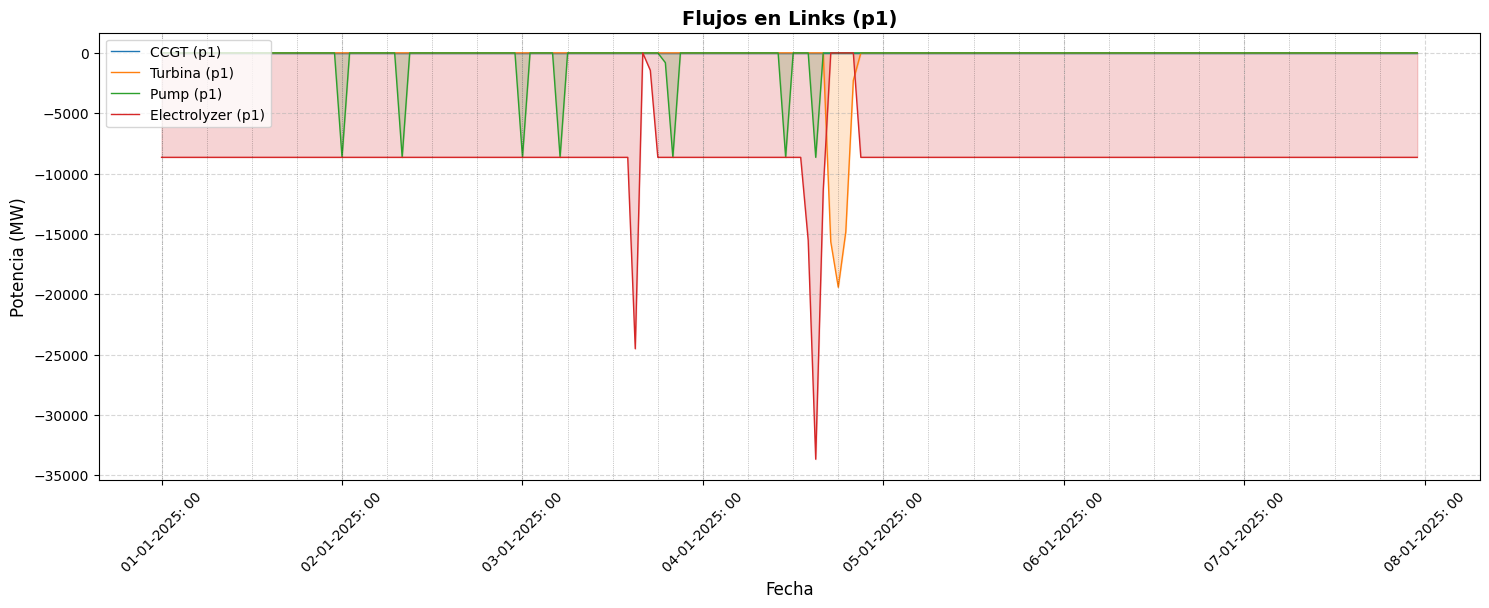

24559.64
   Type  Name    Bus 1               Bus 2     p_nom  capital_cost  \
0  Link  CCGT  gas_bus  electricity_Market  24559.64           NaN   

   efficiency  marginal_cost  Ramp limit up  Ramp limit down carrier  \
0        0.58           96.0     842.356028      1052.945035     Gas   

   overwrite  
0       True  


In [ ]:

# Asegurar las horas correctas
hours = pd.date_range(start="2025-01-01", end="2025-01-07 23:00", freq="H")

plt.figure(figsize=(15, 6))
plt.style.use('default')

# Graficar cada link manualmente (p1)
for link in network.links_t.p1.columns:
    y = network.links_t.p1[link]
    plt.plot(hours, y, label=f"{link} (p1)", linewidth=1)
    plt.fill_between(hours, y, color=plt.gca().lines[-1].get_color(), alpha=0.2)

# Personalización
plt.title("Flujos en Links (p1)", fontsize=14, fontweight="bold")
plt.xlabel("Fecha", fontsize=12)
plt.ylabel("Potencia (MW)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(loc="upper left", fontsize=10)
plt.tight_layout()

# Líneas verticales
for day in pd.date_range("2025-01-01", "2025-01-07"):
    for hour in [0, 6, 12, 18]:
        timestamp = pd.Timestamp(day.date()) + pd.Timedelta(hours=hour)
        plt.axvline(x=timestamp, color='black', linestyle=':', linewidth=0.5, alpha=0.4)

# Formato del eje X
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y: %H'))

plt.show()

print(network.links.loc["CCGT", "p_nom"])
print(df_links[df_links["Name"].str.lower() == "ccgt"])

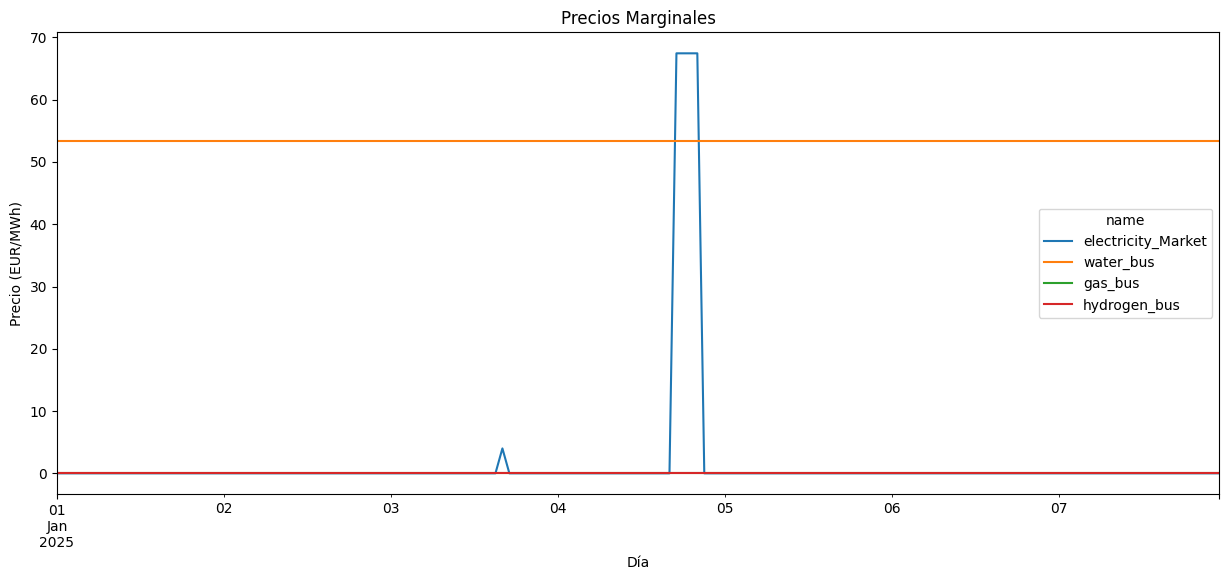

In [ ]:
# PRECIOS MARGINALES
network.buses_t.marginal_price.plot(figsize=(15, 6), title="Precios Marginales")
plt.xlabel("Día")
plt.ylabel("Precio (EUR/MWh)")
plt.show()

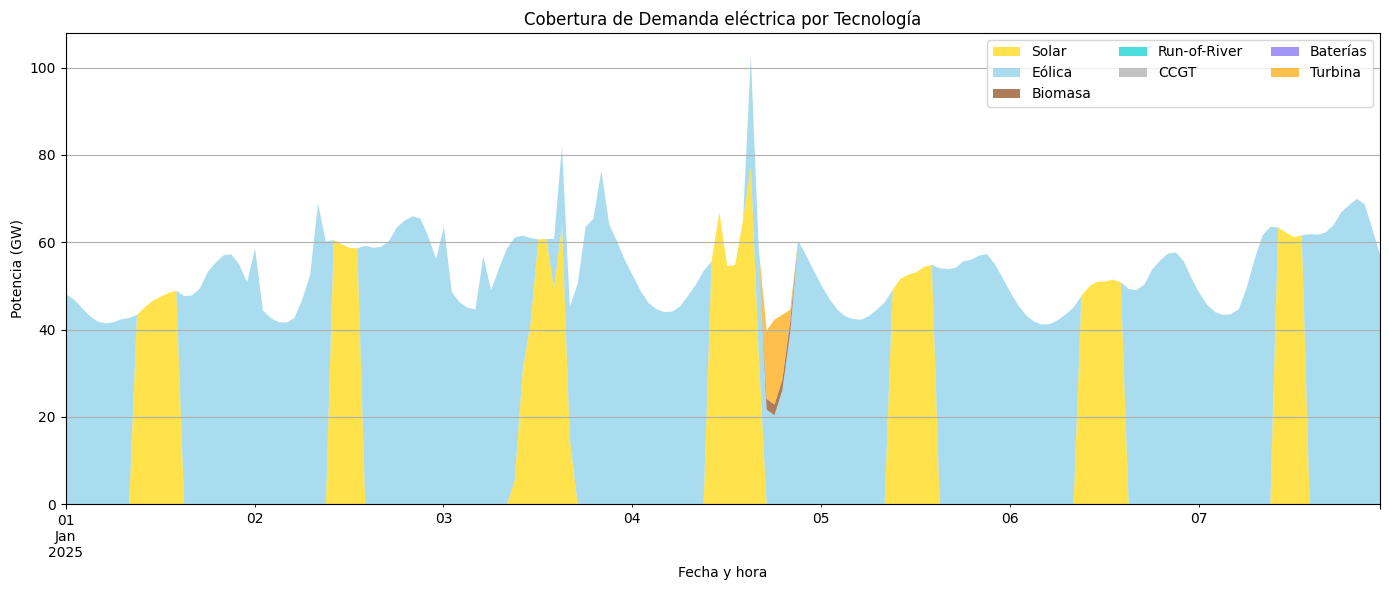

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 2) Index temporal
times = network.snapshots

# 3) Extrae generación de cada generator y asocia carriers
gen = network.generators_t.p                      # DataFrame (t × generators)
gen_car = network.generators["carrier"]           # Series generator → carrier

# 4) Construye series por carrier renovable
renew_carriers = ["Solar", "Wind", "Biomass", "Water", "Gas"]
renew_series = {
    car: gen.loc[:, gen_car == car].sum(axis=1)
    for car in renew_carriers
}

# 5) Extrae CCGT, Turbina y Baterías
ccgt   = -network.links_t.p1["CCGT"].clip(upper=0)
turb   = -network.links_t.p1["Turbina"].clip(upper=0)

# (o, si prefieres basarte en el nombre)
battery_sus = [n for n in network.storage_units.index if "battery" in n.lower()]
h2_sus      = [n for n in network.storage_units.index if "hstor"  in n.lower()]

# 7) Suma neta (descarga +, carga –)
bat_net = network.storage_units_t.p[battery_sus].sum(axis=1)
h2_net  = network.storage_units_t.p[h2_sus].sum(axis=1)

# 8) Descargas (oferta) 
battery_discharge = bat_net.clip(lower=0)
h2_discharge      = h2_net.clip(lower=0)

# 6) Monta el DataFrame final (en MW o GW dividiendo entre 1e3)
df_plot = pd.DataFrame({
    "Solar":         renew_series["Solar"]     / 1e3,
    "Eólica":        renew_series["Wind"]      / 1e3,
    "Biomasa":       renew_series["Biomass"]   / 1e3,
    "Run-of-River":  renew_series["Water"]/1e3,
    "CCGT":          ccgt   / 1e3,
    "Baterías":      battery_discharge/ 1e3,
   #  "H2 Storage":            h2_discharge / 1e3,
    "Turbina":       turb   / 1e3,
}, index=times)
# 7) Colores (ajusta a tu gusto)
colors = {
    "Solar":        "#FFD700",
    "Eólica":       "#87CEEB",
    "Biomasa":      "#8B4513",
    "Run-of-River": "#00CED1",
    "CCGT":         "#A9A9A9",
    "Baterías":     "#7B68EE",
    "Turbina":      "#FFA500",
   #  "H2 Storage":           "#32CD32",
}

c = [colors[col] for col in df_plot.columns]

# 8) Grafica área apilada
fig, ax = plt.subplots(figsize=(14, 6))
df_plot.plot(
    kind="area", ax=ax,
    color=c, alpha=0.7, linewidth=0
)
ax.set_title("Cobertura de Demanda eléctrica por Tecnología")
ax.set_xlabel("Fecha y hora")
ax.set_ylabel("Potencia (GW)")
ax.legend(loc="upper right", ncol=3)
ax.grid(True)
plt.tight_layout()
plt.show()

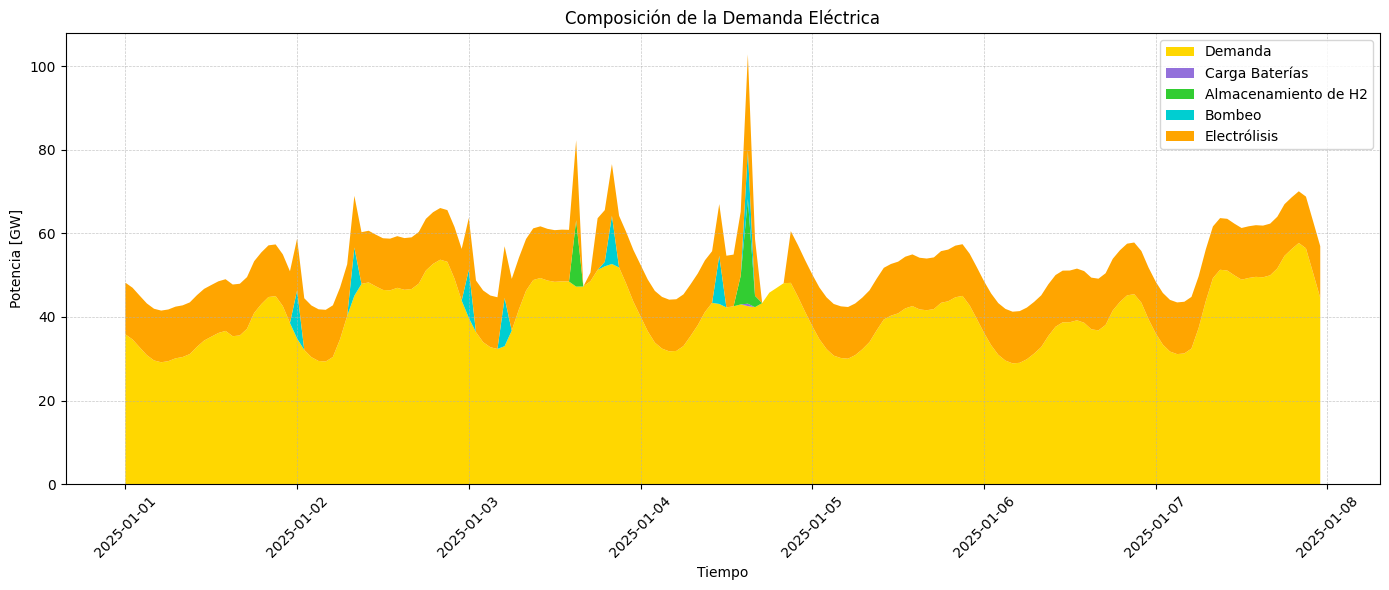

In [ ]:
import matplotlib.pyplot as plt

# 1) Demanda nacional (MW → GW)
national_demand = network.loads_t.p_set["Demanda_Nacional"]/ 1e3

# 2) Carga de baterías (solo valores de carga → negativos en storage.p)
battery_sus = [n for n in network.storage_units.index if "battery" in n.lower()]
h2_sus      = [n for n in network.storage_units.index if "hstor"  in n.lower()]

battery_charge = (network.storage_units_t.p[battery_sus]
                  .clip(upper=0)
                  .sum(axis=1)
                  .abs() / 1e3)
h2_charge= (network.storage_units_t.p[h2_sus]
                  .clip(upper=0)
                  .sum(axis=1)
                  .abs() / 1e3)
# 3) Bombeo hidráulico (extracción de electricity → links_t.p0 positivo)
pumped_links = [l for l in network.links.index 
                if "pump" in l.lower() or "bombeo" in l.lower()]
pumping_demand = (network.links_t.p0[pumped_links]
                  .clip(lower=0)
                  .sum(axis=1) / 1e3)

# 4) Electrolysis (idem bombeo: consumo eléctrico en p0)
electrolyzer_links = [l for l in network.links.index 
                      if "electrolyzer" in l.lower()]
electrolyzer_demand = (network.links_t.p0[electrolyzer_links]
                       .clip(lower=0)
                       .sum(axis=1) / 1e3)
electrolyzer_demand_final=electrolyzer_demand- h2_charge
# 5) Plot apilado
plt.figure(figsize=(14, 6))
plt.stackplot(
    national_demand.index,
    national_demand,
    battery_charge,
    h2_charge,
    pumping_demand,
    electrolyzer_demand_final,
   labels=["Demanda", "Carga Baterías","Almacenamiento de H2", "Bombeo", "Electrólisis"],
   colors=[
        "#FFD700",  # Demanda (amarillo)
        "#9370DB",  # Carga Baterías (púrpura)
        "#32CD32",  # Carga H₂ (verde)  
        "#00CED1",  # Bombeo (cian)
        "#FFA500",  # Electrólisis (naranja)
   ],
    linewidth=0.5
)

plt.title("Composición de la Demanda Eléctrica")
plt.ylabel("Potencia [GW]")
plt.xlabel("Tiempo")
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.7)
plt.legend(loc="upper right", fontsize=10)
plt.tight_layout()
plt.show()
